Link do youtube aqui

# 1

Tendo como ponto de partida o exercício do Trabalho 1, as bibliotecas necessárias serão importadas, mas com apenas um algoritmo de classificação, no caso, foi selecionado o RandomForest. Para utilizar o TargetEncoder foi necessário a instalação do pacote category_encoders e fazer a importação desta biblioteca (TargetEncoder)

In [17]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from category_encoders import TargetEncoder

Fazer a carga dos datasets a partir dos arquivos credtrain.txt e credtest.txt, passando o nome das colunas. Verificar se o dataset foi carregado corretamente e analisar o conteúdo do dataset

In [18]:
# Define o nomes das colunas
nomes_colunas = ['ESCT', 'NDEP', 'RENDA', 'TIPOR', 'VBEM', 'NPARC', 'VPARC', 'TEL', 'IDADE', 'RESMS', 'ENTRADA', 'CLASSE']

# Carrega o dataset de treinamento
dsTrain = pd.read_csv('../data/credtrain.txt', names=nomes_colunas, sep='\t', header=0)

# Carrega o dataset de teste
dsTeste = pd.read_csv('../data/credtest.txt', names=nomes_colunas, sep='\t', header=0 )


In [19]:
dsTrain.head()
dsTeste.head()
dsTrain.info()
dsTrain.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ESCT     1499 non-null   int64
 1   NDEP     1499 non-null   int64
 2   RENDA    1499 non-null   int64
 3   TIPOR    1499 non-null   int64
 4   VBEM     1499 non-null   int64
 5   NPARC    1499 non-null   int64
 6   VPARC    1499 non-null   int64
 7   TEL      1499 non-null   int64
 8   IDADE    1499 non-null   int64
 9   RESMS    1499 non-null   int64
 10  ENTRADA  1499 non-null   int64
 11  CLASSE   1499 non-null   int64
dtypes: int64(12)
memory usage: 140.7 KB


,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
count,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000
mean,0.511674,0.126751,984.928619,0.445630,562.197465,8.392262,102.280854,0.134089,41.221481,31.517678,32.276851,0.476318
std,0.660009,0.573047,905.691299,0.497201,265.701366,3.610302,62.994960,0.340862,13.200024,52.677954,94.335403,0.499606
min,0.000000,0.000000,300.000000,0.000000,300.000000,1.000000,50.000000,0.000000,19.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,468.500000,0.000000,410.000000,6.000000,66.000000,0.000000,31.000000,6.000000,0.000000,0.000000
50%,0.000000,0.000000,650.000000,0.000000,490.000000,10.000000,83.000000,0.000000,39.000000,6.000000,0.000000,0.000000
75%,1.000000,0.000000,1200.000000,1.000000,618.000000,10.000000,118.000000,0.000000,52.000000,48.000000,0.000000,1.000000
max,3.000000,7.000000,8000.000000,1.000000,4000.000000,24.000000,711.000000,1.000000,70.000000,420.000000,1300.000000,1.000000


No trabalho anterior foi utilizado o One-hot-encoding para codificar os atributos categóricos. Para este trabalho será utilizado o TargetEncoder para o campo com Estado Civil (ESCT).

No dataset apresentado é identificado alguns atributos categóricos, ainda que estejam representados numericamente, como: Estado Civil (ESCT), Tipo de residência (TIPOR) e se o cliente possui telefone (TEL). Nesses casos será aplicado a técnica de One-hot-encoding, que transpõe os domínios encontrados nestes atributos em campos nomeados destes valores. O campo de número de dependentes (NDEP), apesar de categório, apresenta-se de forma númerica e ordenada, característica coerente com a natureza deste atributo, sendo assim, não será necessário aplicar a técnica de One-hot-encoding em NDEP.

In [20]:
valoresESCT = dsTrain['ESCT'].unique()

import category_encoders 
encoder = TargetEncoder(cols=['ESCT'])

#category_encoders.
# Ajustando o encoder aos dados
encoder.fit(dsTrain['ESCT'], dsTrain['CLASSE'])
encoder.fit(dsTeste['ESCT'], dsTeste['CLASSE'])

# Codificando a variável 'ESCT' no DataFrame original
dsTrain['ESCT Encoded'] = encoder.transform(dsTrain['ESCT'], dsTrain['CLASSE'])
dsTeste['ESCT Encoded'] = encoder.transform(dsTeste['ESCT'], dsTeste['CLASSE'])

#dsTrain.head()
dsTrain.describe()


c:\Users\helio\AppData\Local\Programs\Python\Python312\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\helio\AppData\Local\Programs\Python\Python312\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\helio\AppData\Local\Programs\Python\Python312\Lib\site-packages\category_encoders\ordinal.py:198: Futur

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE,ESCT Encoded
count,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000
mean,0.511674,0.126751,984.928619,0.445630,562.197465,8.392262,102.280854,0.134089,41.221481,31.517678,32.276851,0.476318,0.467028
std,0.660009,0.573047,905.691299,0.497201,265.701366,3.610302,62.994960,0.340862,13.200024,52.677954,94.335403,0.499606,0.102593
min,0.000000,0.000000,300.000000,0.000000,300.000000,1.000000,50.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.376997
25%,0.000000,0.000000,468.500000,0.000000,410.000000,6.000000,66.000000,0.000000,31.000000,6.000000,0.000000,0.000000,0.376997
50%,0.000000,0.000000,650.000000,0.000000,490.000000,10.000000,83.000000,0.000000,39.000000,6.000000,0.000000,0.000000,0.376997
75%,1.000000,0.000000,1200.000000,1.000000,618.000000,10.000000,118.000000,0.000000,52.000000,48.000000,0.000000,1.000000,0.588745
max,3.000000,7.000000,8000.000000,1.000000,4000.000000,24.000000,711.000000,1.000000,70.000000,420.000000,1300.000000,1.000000,0.588745


Como os registros do dataset são numéricos, aplicaremos uma discritização do campo NDEP, número de dependentes, para quatro faixas, a saber: "sem dependentes", "com 1 dependente", "com 2 dependentes", "com mais de 2 dependentes". Após esta operação utilizaremos o OrdinalEncoder para aplicar o segundo método solicitado no exercício.

In [22]:
# Defina os limites dos bins
bins = [-1, 0, 1, 2, float('inf')]  # O último intervalo é para >2

# Defina as categorias correspondentes
labels = ["sem dependente", "um dependente", "dois dependente", "mais de dois dependentes"]

# Use a função cut para criar os bins
dsTrain['NDEP_faixa'] = pd.cut(dsTrain['NDEP'], bins=bins, labels=labels)

dsTrain.head()
#dsTrain.describe()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE,ESCT Encoded,NDEP_faixa
0,0,0,350,1,468,10,65,0,33,6,0,1,0.376997,sem dependente
1,0,0,1100,0,829,9,125,0,56,48,0,1,0.376997,sem dependente
2,0,0,3000,0,552,12,76,1,31,60,0,1,0.376997,sem dependente
3,1,0,1000,0,809,12,111,0,24,7,0,1,0.588745,sem dependente
4,0,0,300,0,331,6,74,1,41,0,0,1,0.376997,sem dependente


O dataset é separado em features (X) e target (y) para o dataset de Treinamento (dsTrain) e de teste (dsTeste)

Para equalizar os dados de entrada (feature), foi aplicado a função StandardScaler.

In [5]:
# Carregar os datasets em features (X) e target (y)
X_train = dsTrain.drop('CLASSE', axis=1)
y_train = dsTrain['CLASSE']

X_test = dsTeste.drop('CLASSE', axis=1)
y_test = dsTeste['CLASSE']

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Preprocessing MixMax
minmax_scale = MinMaxScaler()
X_train = minmax_scale.fit_transform(X_train)
X_test = minmax_scale.transform(X_test)

Uma vez realizado o pré-processamento dos dados, o modelo será treinado com os algoritmos solicitados. Verificando a acurácia de modelo.

Regressão Logística

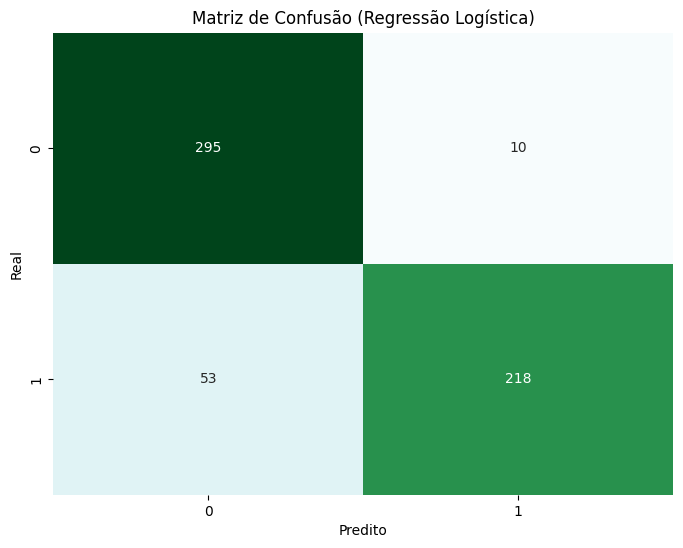

Acurácia do modelo: 0.890625


In [6]:
# Criar uma lista para os valores de acurácia e os modelos
listaModelos = ['Regressão Logística', 'Arvore de Decisão', 'Random Forest', 'K Neighbors', 'Gradient Boosting']
listaAcuracia =[]

# Aplicando a Regressão Logística
modelLR = LogisticRegression(solver='lbfgs', random_state=0)
modelLR.fit(X_train, y_train)

# Fazer a predição da Regressão Logística
y_predict_LR = modelLR.predict(X_test)


# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_predict_LR)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_predict_LR)
listaAcuracia.append(accuracy)

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="BuGn", cbar=False)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão (Regressão Logística)')
plt.show()

print(f'Acurácia do modelo: {accuracy}')

Decision Tree Classifier

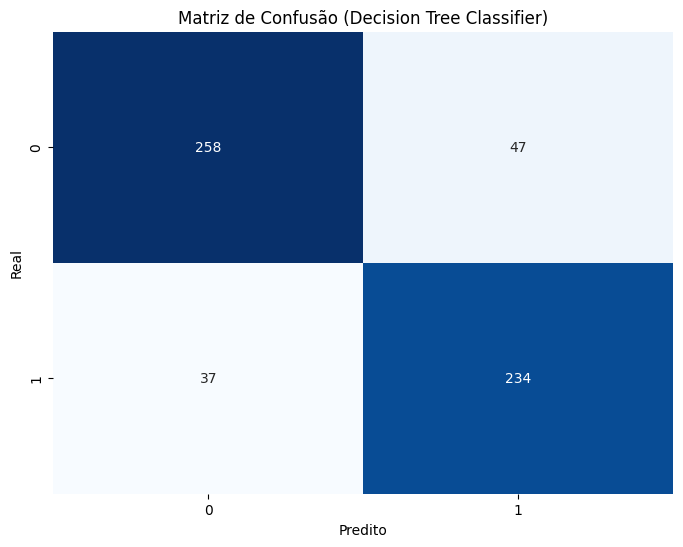

Acurácia do modelo: 0.8541666666666666


In [7]:
# Aplicando a Decision Tree Classifier
modelTree = DecisionTreeClassifier(random_state=13)
modelTree.fit(X_train, y_train)

# Fazer a predição da Decision Tree Classifier
y_predict_Tree = modelTree.predict(X_test)

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_predict_Tree)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_predict_Tree)
listaAcuracia.append(accuracy)

# Visualizar a Decision Tree Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão (Decision Tree Classifier)')
plt.show()

print(f'Acurácia do modelo: {accuracy}')



Random Forest Classifier

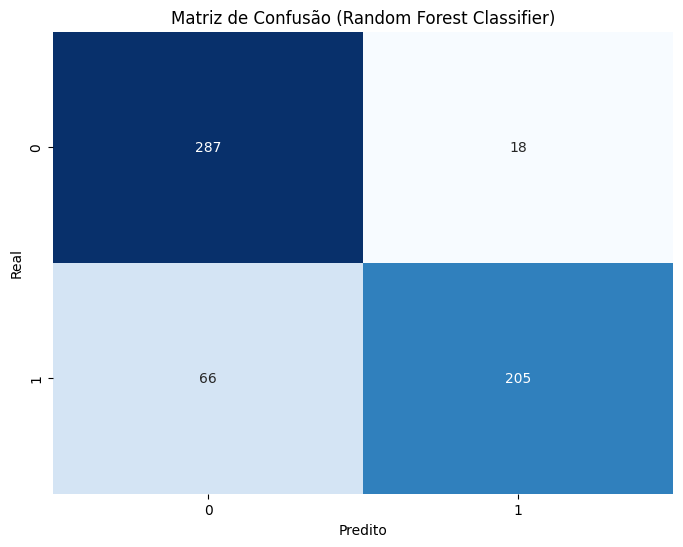

Acurácia do modelo: 0.8541666666666666


In [8]:
# Aplicando a Random Forest Classifier
modelRF = RandomForestClassifier(n_estimators=2, random_state=0)
modelRF.fit(X_train, y_train)

# Fazer a predição da Random Forest Classifier
y_predict_RF = modelRF.predict(X_test)

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_predict_RF)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_predict_RF)
listaAcuracia.append(accuracy)

# Visualizar a Random Forest Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão (Random Forest Classifier)')
plt.show()

print(f'Acurácia do modelo: {accuracy}')


K Neighbors Classifier

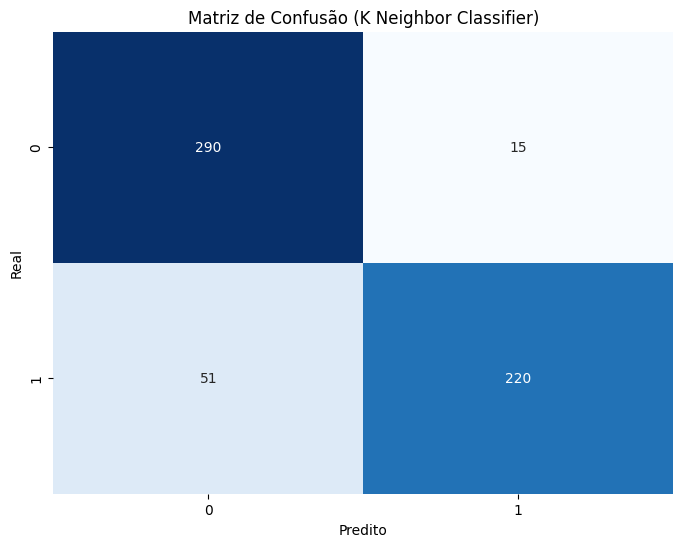

Acurácia do modelo: 0.8854166666666666


In [9]:
# Aplicando a K Neighbors Classifier
modelKN = KNeighborsClassifier(n_neighbors=5)
modelKN.fit(X_train, y_train)

# Fazer a predição de K Neighbors Classifier
y_predict_KN = modelKN.predict(X_test)

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_predict_KN)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_predict_KN)
listaAcuracia.append(accuracy)

# Visualizar a K Neighbors Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão (K Neighbor Classifier)')
plt.show()

print(f'Acurácia do modelo: {accuracy}')



Gradient Boosting Classifier

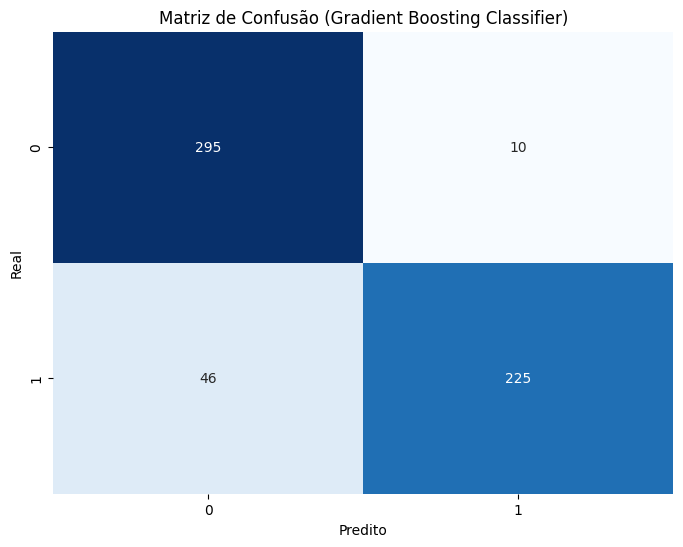

Acurácia do modelo: 0.9027777777777778


In [10]:
# Aplicando a Gradient Boosting Classifier
modelGB = GradientBoostingClassifier()
modelGB.fit(X_train, y_train)

# Fazer a predição de Gradient Boosting Classifier
y_predict_GB = modelGB.predict(X_test)

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_predict_GB)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_predict_GB)
listaAcuracia.append(accuracy)

# Visualizar a Gradiente Boosting Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão (Gradient Boosting Classifier)')
plt.show()

print(f'Acurácia do modelo: {accuracy}')



In [11]:
# Modelo com melhor precisão
iMelhor=(listaAcuracia.index(max(listaAcuracia)))


print("O melhor modelo é", listaModelos[iMelhor], "com acurácia de", listaAcuracia[iMelhor])

O melhor modelo é Gradient Boosting com acurácia de 0.9027777777777778


# 2 (Antigo)

Importar as bibliotecas necessárias (para efeito didático algumas bibliotecas serão carregadas novamente, as mesmas já carregadas no inicio do notebook) e carregar os dados em arquivo texto para o dataset

In [12]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

Carregar os dados dos diamantes a partir do arquivo de texto. 

In [13]:
# Carregar o dataset a partir do arquivo texto
dataset = pd.read_csv('../data/diamonds.csv', header=0)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Os campos cut, color e clarity são objetos e devem ser convertidos em valores numéricos para processamento dos algoritmos. Estes campos obedecem uma ordem qualitativa, então foi utilizado o recurso Ordinal Encoder para fazer esta transformação. 

In [14]:
#dataset.cut.unique()
dataset.clarity.unique()

# Determina um vetor com valores crescentes dos atributos cut, color e clarity
order_cut = ['Fair','Good', 'Very Good', 'Premium', 'Ideal']
order_color = ['J','I','H','G','F','E','D']
order_clarity = ['I3','I2','I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF','FL']

# Adiciona campo cut com numeraçao crescente
order_encoder_cut=OrdinalEncoder(categories=[order_cut])
cut_encoded = order_encoder_cut.fit_transform(dataset[['cut']])
dataset['cut_encoded'] = cut_encoded

# Adiciona campo color com numeraçao crescente
order_encoder_color=OrdinalEncoder(categories=[order_color])
color_encoded = order_encoder_color.fit_transform(dataset[['color']])
dataset['color_encoded'] = color_encoded

# Adiciona campo clarity com numeraçao crescente
order_encoder_clarity=OrdinalEncoder(categories=[order_clarity])
clarity_encoded = order_encoder_clarity.fit_transform(dataset[['clarity']])
dataset['clarity_encoded'] = clarity_encoded

# Remover as colunas de objetos que foram transformados
dataset = dataset.drop('cut', axis=1)
dataset = dataset.drop('color', axis=1)
dataset = dataset.drop('clarity', axis=1)

# Remove o campo identidade do ínico
dataset = dataset.drop(dataset.columns[0], axis=1) 
dataset.head()
dataset.drop(dataset.columns[0], axis=1)

# Remover os registros onde a dimensão do diamante é zero
dataset = dataset.drop(dataset[dataset["x"]==0].index)
dataset = dataset.drop(dataset[dataset["y"]==0].index)
dataset = dataset.drop(dataset[dataset["z"]==0].index)


dataset.describe()

,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046,2.904228,3.405972,5.051502
std,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530,1.116579,1.701272,1.647005
min,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.000000,0.000000,2.000000
25%,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,2.000000,2.000000,4.000000
50%,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000,3.000000,5.000000
75%,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000,4.000000,5.000000,6.000000
max,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,4.000000,6.000000,9.000000


E fazer a separação em dois datasets: treinamento e teste obedecendo a relação de 20% em relação ao total de registros. Para isto, será usado a biblioteca train_test_split. 

In [15]:
# Define as features e o target do modelo (campo price) para predizer o valor
X= dataset.drop(["price"],axis =1)
y= dataset["price"]

# Separar em teste e treinamento na razão de 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Preprocessing MixMax
minmax_scale = MinMaxScaler()
X_train = minmax_scale.fit_transform(X_train)
X_test = minmax_scale.transform(X_test)

Realizar o treinamento com cada um dos algoritmos de regressão listados: Regressão Linear, Lasso, Decison Tree Regressor, K Neighbors Regressor e Gradient Boosting Regressor. Como esses algoritmos de regressão compartilham as mesmas chamadas de fit, predict, r2_score e mean_squared_error, utilizando os hiperparâmetros padrões, será definida uma lista com as funções a serem executadas em bloco.

In [16]:
# Definir a lista dos algoritmos a serem utilizados
listaAlgoritmosReg = [LinearRegression, Lasso, DecisionTreeRegressor, RandomForestRegressor, KNeighborsRegressor, GradientBoostingRegressor]

# Armazena o melhor algoritmo com base no valor do r2 (maior = melhor)
melhorR2 = 0
melhorMse = 0
melhorAlgoritmo = ""

for modeloAlgo in listaAlgoritmosReg:
    modeloSelecionado = modeloAlgo()
    modeloSelecionado.fit(X_train, y_train)
    y_pred_sel = modeloSelecionado.predict(X_test)

    mse = mean_squared_error(y_test, y_pred_sel)
    r2 = r2_score(y_test, y_pred_sel)

    if (r2 > melhorR2):
        melhorR2 = r2
        melhorMse= mse
        melhorAlgoritmo = modeloAlgo.__name__


    print(modeloAlgo.__name__)
    print("MSE = " ,mse)
    print('R2 = %.2f' % r2)
    print("--------------------------------------------------")

print("Melhor algoritmo = ", melhorAlgoritmo)
print("MSE = ", melhorMse)
print("R2 = ", melhorR2)

LinearRegression
MSE =  2646009.3088137344
R2 = 0.84
--------------------------------------------------
Lasso
MSE =  2623195.715663268
R2 = 0.84
--------------------------------------------------
DecisionTreeRegressor
MSE =  560276.6093853033
R2 = 0.97
--------------------------------------------------
RandomForestRegressor
MSE =  290199.6406943263
R2 = 0.98
--------------------------------------------------
KNeighborsRegressor
MSE =  511619.7383531157
R2 = 0.97
--------------------------------------------------
GradientBoostingRegressor
MSE =  380170.457519977
R2 = 0.98
--------------------------------------------------
Melhor algoritmo =  RandomForestRegressor
MSE =  290199.6406943263
R2 =  0.9820800442975219


# 2

Como primeiro passo, vamos para a importação das bibliotecas necessárias.

In [17]:
import numpy as np
import pandas as pd
import pickle
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler



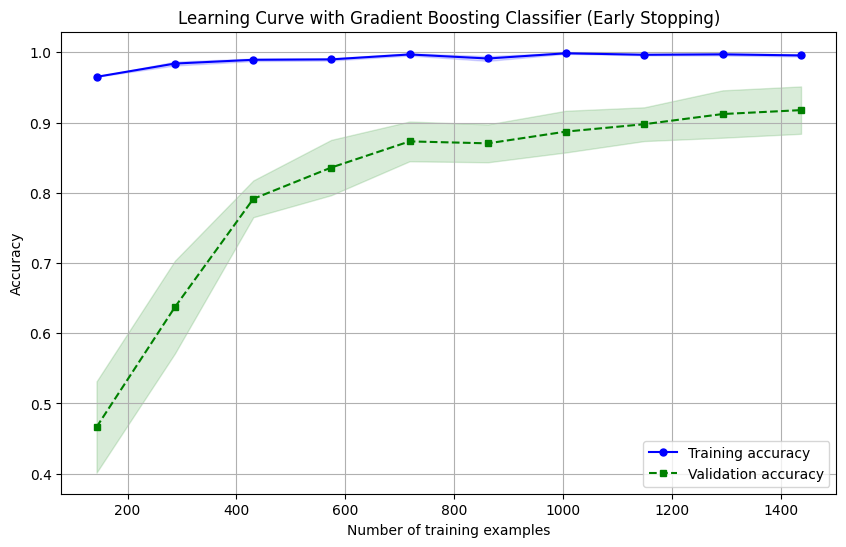

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits
from sklearn.ensemble import GradientBoostingClassifier

# Carregar conjunto de dados
digits = load_digits()
X, y = digits.data, digits.target

# Definir modelo GradientBoostingClassifier com early stopping
model = GradientBoostingClassifier(n_estimators=100, validation_fraction=0.1, n_iter_no_change=5, random_state=42)

# Calcular curva de aprendizado
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

# Calcular médias e desvios padrão dos escores de treinamento e teste
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotar curva de aprendizado
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.title('Learning Curve with Gradient Boosting Classifier (Early Stopping)')
plt.show()

Fazer a importação dos dados a partir dos arquivos no formato pickle: A602.pickle, A621.pickle, A627.pickle, A636.pickle, A652.pickle. Depois unificar em um único dataset para análise

In [18]:
arquivos_pickle = ['A602','A621','A627','A636','A652']

flag = True
for index, arquivo in enumerate(arquivos_pickle):
    caminho = '../data/atmoseer/'
    extensao = '.pickle'

    outfilename = caminho + arquivo + extensao
    print(outfilename)

    f = open(outfilename, 'rb')

    #Primeira ocorrencia do arquivo
    if (flag):
        (X_train_0 , y_train_0 , X_val_0 , y_val_0 , X_test_0 , y_test_0 ) = pickle.load(f) 
        flag = False
    else:
        (X_train_i , y_train_i , X_val_i , y_val_i , X_test_i , y_test_i ) = pickle.load(f) 

        # Adicionar conteúdo do arquivo pickle acumulando valores
        X_train_0 = np.vstack((X_train_0, X_train_i))
        y_train_0 = np.vstack((y_train_0, y_train_i))

        X_val_0 = np.vstack((X_val_0, X_val_i))
        y_val_0 = np.vstack((y_val_0, y_val_i))

        X_test_0 = np.vstack((X_test_0, X_test_i))
        y_test_0 = np.vstack((y_test_0, y_test_i))

# Converter as matrizes para dataframes
X_train = pd.DataFrame(X_train_0)
y_train = pd.DataFrame(y_train_0)

X_val = pd.DataFrame(X_val_0)
y_val = pd.DataFrame(y_val_0)

X_test = pd.DataFrame(X_test_0)
y_test = pd.DataFrame(y_test_0)

X_train.describe()


../data/atmoseer/A602.pickle
../data/atmoseer/A621.pickle
../data/atmoseer/A627.pickle
../data/atmoseer/A636.pickle
../data/atmoseer/A652.pickle


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,...,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000,49640.000000
mean,0.421857,0.505501,0.747884,0.505829,0.471072,0.499833,0.495685,0.003897,0.422227,0.505237,...,0.495875,0.003891,0.422468,0.505024,0.746911,0.505727,0.471356,0.497698,0.496346,0.003880
std,0.154925,0.160470,0.181923,0.131709,0.149439,0.353127,0.353960,0.029061,0.155056,0.160375,...,0.353346,0.029044,0.155201,0.160298,0.182331,0.132072,0.149600,0.354302,0.352784,0.029017
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.313433,0.395918,0.638889,0.430825,0.353270,0.146447,0.146447,0.000000,0.313433,0.395918,...,0.146447,0.000000,0.313433,0.395918,0.638889,0.430387,0.353372,0.146447,0.146447,0.000000
50%,0.403042,0.500000,0.782051,0.495847,0.459387,0.500000,0.500000,0.000000,0.403448,0.500000,...,0.500000,0.000000,0.403448,0.497976,0.782051,0.495806,0.459387,0.500000,0.500000,0.000000
75%,0.513793,0.607287,0.888889,0.571563,0.572553,0.853553,0.853553,0.000000,0.516729,0.607287,...,0.853553,0.000000,0.516854,0.605691,0.888889,0.571992,0.572898,0.853553,0.853553,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Uma vez unificado o dataset, é necessário executar algumas rotinas de pré-processamento. A primeira alteração é modificar o alvo (y) de valores contínuos para binários, pois será usado um algoritmo de classificação. 

In [19]:
y_train.tail()
y_train.describe()

# Converter em valor binário os targets
y_train[0] = np.where(y_train[0]==0,0,1)
y_val[0] = np.where(y_val[0]==0,0,1)
y_test[0] = np.where(y_test[0]==0,0,1)

y_train.describe()


,0
count,49640.000000
mean,0.083884
std,0.277217
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Aplicar o treinamento com os dados desbalanceados seguido de análise com dados onde foram aplicadas as técnicas balanceamento: undersampling, oversampling e alteração de limiar. Todos os treinamentos utilizando o algoritmo Gradient Boosting Classifier. Para facilitar a execução, será criada uma função para execução do algoritmo.

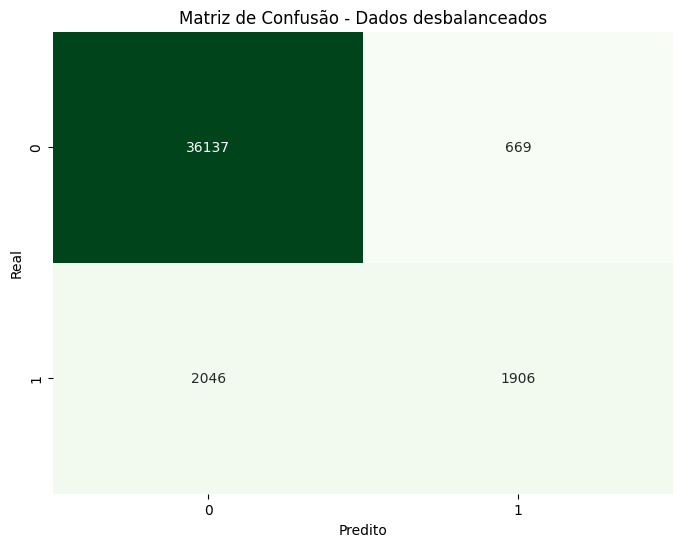

           Dados desbalanceados
Precision                0.9334
Recall                   0.4823
F1_score                 0.5840


In [20]:
warnings.filterwarnings("ignore")

def executarGBC(_X_train, _y_train, _X_test, _y_test, cabecalho):
    # Aplicando a Gradient Boosting Classifier
    modelGB = GradientBoostingClassifier()
    modelGB.fit(_X_train, _y_train)

    # Fazer a predição de Gradient Boosting Classifier
    y_predict_GB = modelGB.predict(_X_test)

    # Gerar a matriz de confusão
    conf_matrix = confusion_matrix(_y_test, y_predict_GB)

    # Calcular a acurácia
    accuracy = accuracy_score(_y_test, y_predict_GB)
    
    # Visualizar a Gradiente Boosting Classifier
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão - ' + cabecalho)
    plt.show()


    precision_relatorio =  round(accuracy_score(_y_test, y_predict_GB), 4)
    recall_relatorio = round(recall_score(_y_test, y_predict_GB), 4)
    F1_relatorio =  round(f1_score(_y_test, y_predict_GB), 4)
    metrics_relatorio = [precision_relatorio, recall_relatorio, F1_relatorio]

    relatorio = pd.DataFrame(list(metrics_relatorio))
    relatorio.index = ['Precision', 'Recall', 'F1_score']
    relatorio.columns = [cabecalho]
    print(relatorio)

    return accuracy

# Analise dos dados sem balanceamento
a = executarGBC(X_train, y_train, X_test, y_test, "Dados desbalanceados")


# overfitting
decision_tree = DecisionTreeRegressor()train_sizes, train_scores, test_scores = learning_curve(estimator=decision_tree,X=X,y=y,cv=5,scoring="neg_root_mean_squared_error",train_sizes = range(1, 330, 10))

Balanceamento usando Oversampling

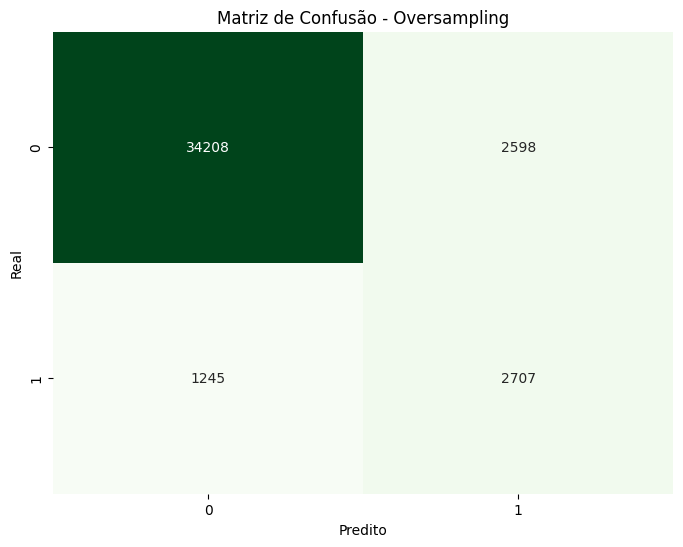

           Oversampling
Precision        0.9057
Recall           0.6850
F1_score         0.5849


In [21]:
# Aplicação de balanceamento por oversampling
smote_oversample = SMOTE()
X_train_smote, y_train_smote = smote_oversample.fit_resample(X_train, y_train)

# Executar análise após balanceamento por oversampling
b = executarGBC(X_train_smote, y_train_smote, X_test, y_test, "Oversampling")


Balanceamento com undersampling

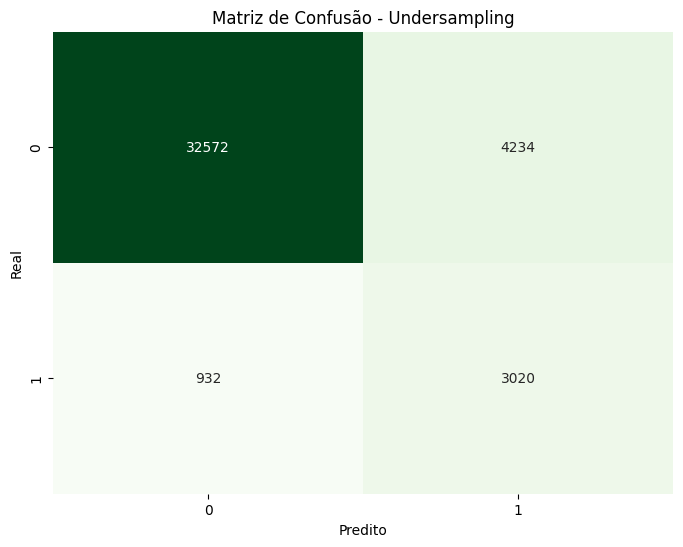

           Undersampling
Precision         0.8733
Recall            0.7642
F1_score          0.5390


In [22]:
# Aplicação de balanceamento por undersampling
rus_undersample = RandomUnderSampler(random_state=0)
X_train_rus, y_train_rus = rus_undersample.fit_resample(X_train, y_train)

# Executar análise após balanceamento por oversampling
c = executarGBC(X_train_rus, y_train_rus, X_test, y_test, "Undersampling")


Balanceamento por alteração de limiar

In [23]:
# Inicia o treinamento com o algoritmo GradientBoostingClassifier
modelThreHold = GradientBoostingClassifier()
modelThreHold.fit(X_train, y_train)

# Dados para montagem do relatório
metrics_original = [a]
cols = ['Metrics', 'Original']
adj_threshold = pd.DataFrame()
adj_threshold['Original'] = metrics_original

# Definição de um range de valores de limiares (threshold)
thresholds = [ j/20 for j in range(1,16)]

# Interage com o modelo nas variações de threholds
for i in thresholds:
    y_pred_new_threshold = (modelThreHold.predict_proba(X_test)[:,1]>=i).astype(int) #calculating the threshold with respect to class 1

    precision_adj_threshold =  accuracy_score(y_test, y_pred_new_threshold)
    metrics_adj_threshold = [precision_adj_threshold]

    name = 'Threshold: ' + str(i) 
    adj_threshold[name] = metrics_adj_threshold
    cols.append(name)

# Geração do relatorio
adj_threshold.index = ['Precision']
adj_threshold = adj_threshold.reset_index()
adj_threshold.columns = cols
adj_threshold.transpose()

adj_threshold1 = adj_threshold.transpose().iloc[1:, :]
adj_threshold1.columns = adj_threshold.iloc[:,0]
adj_threshold1

Metrics,Precision
Original,0.933387
Threshold: 0.05,0.825237
Threshold: 0.1,0.900584
Threshold: 0.15,0.914127
Threshold: 0.2,0.920654
Threshold: 0.25,0.925389
Threshold: 0.3,0.929511
Threshold: 0.35,0.93194
Threshold: 0.4,0.933093
Threshold: 0.45,0.932749


Na análise dos valores de alteração de limiar, o valor de 0.50, o valor padrão, obteve o melhor resultado. Para efeito de análise, será utilizado um limiar 0.55 com valores bem próximos na acurácia em relação ao modelo desbalanceado. Desta forma, vamos aplicar este fator para o treinamento do modelo.


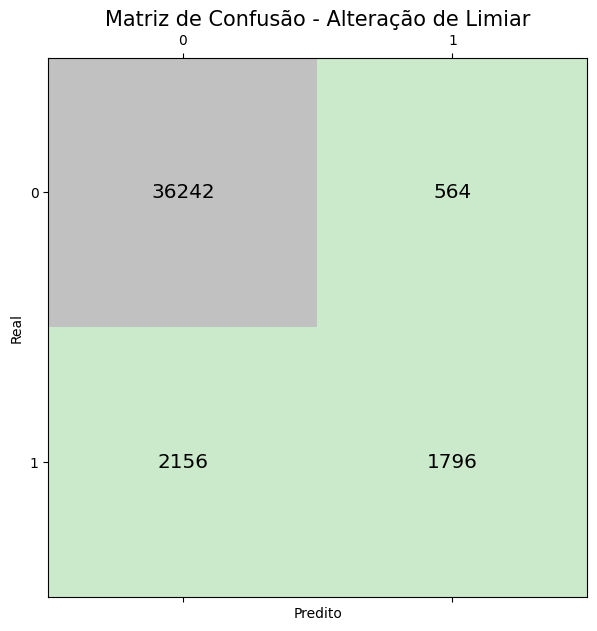

,Alteração de Limiar a 0.55
Precision,0.9333
Recall,0.4545
F1_score,0.5691


In [24]:
y_pred_new_threshold = (modelThreHold.predict_proba(X_test)[:,1]>=0.55).astype(int)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_new_threshold)

fig, ax = plt.subplots(figsize=(7, 7))
ax.matshow(conf_matrix, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')
 
plt.xlabel('Predito', fontsize=10)
plt.ylabel('Real', fontsize=10)
plt.title('Matriz de Confusão - Alteração de Limiar', fontsize=15)
plt.show()


precision_changedthreshold =  round(accuracy_score(y_test, y_pred_new_threshold), 4)
recall_changedthreshold = round(recall_score(y_test, y_pred_new_threshold), 4)
F1_changedthreshold =  round(f1_score(y_test, y_pred_new_threshold), 4)
metrics_changedthreshold = [precision_changedthreshold, recall_changedthreshold, F1_changedthreshold]

changedthreshold = pd.DataFrame(list(metrics_changedthreshold))
changedthreshold.index = ['Precision', 'Recall', 'F1_score']
changedthreshold.columns = ['Alteração de Limiar a 0.55']
changedthreshold

Analisando todos os resultados encontrados, verificou-se que mesmo com os dados desbalanceados, o índice de acurácia encontrado sem desbalanceamento foi superior aos modelos em que foram aplicados balanceamento de oversampling, undersampling e alteração de limiar.

# 4

Como este exercício é uma continuação do anterior, vou manter as bibliotecas já importadas e os datasets criados a partir dos arquivos Pickles no exercício anterior. Inclusive as alterações para valores binários também serão aproveitados do exercício anterior (3)

In [25]:
# Copiar o conjunto de dados original para C
C_X_train = X_train.copy()
C_y_train = y_train.copy()
C_X_test = X_test.copy()
C_y_test = y_test.copy()

Como a análise deve ser efetuada individualmente para cada arquivo pickle, o dataset deve ser desmembrado para ter um dataset por arquivo.

In [26]:
# Analisa os cinco arquivos pickle
arquivos_pickle = ['A602','A621','A627','A636','A652']
caminho = '../data/atmoseer/'
extensao = '.pickle'

# Faz a interação dos arquivos para desmembrar em datasets de cada pickle
inicio_train = 0
inicio_test = 0

for index, arquivo in enumerate(arquivos_pickle):
    outfilename = caminho + arquivo + extensao

    # Carrega novamente os arquivos para retornar o tamanho de cada um    
    f =open( outfilename ,'rb')
    (X_train_Dummy , y_train_Dummy , X_val_Dummy , y_val_Dummy , X_test_Dummy , y_test_Dummy ) = pickle.load(f) 
        
    # Conforme o tamanho retornado é criado um dataset para cada arquivo
    match index:
        case 0:
            C_X_train_A602 = C_X_train.loc[inicio_train: inicio_train + X_train_Dummy.shape[0] - 1]
            C_y_train_A602 = C_y_train.loc[inicio_train: inicio_train + y_train_Dummy.shape[0] - 1]
            C_X_test_A602 = C_X_test.loc[inicio_test: inicio_test + X_test_Dummy.shape[0] - 1]
            C_y_test_A602 = C_y_test.loc[inicio_test: inicio_test + y_test_Dummy.shape[0] - 1]
        case 1:
            C_X_train_A621 = C_X_train.loc[inicio_train: inicio_train + X_train_Dummy.shape[0] - 1]
            C_y_train_A621 = C_y_train.loc[inicio_train: inicio_train + y_train_Dummy.shape[0] - 1]
            C_X_test_A621 = C_X_test.loc[inicio_test: inicio_test + X_test_Dummy.shape[0] - 1]
            C_y_test_A621 = C_y_test.loc[inicio_test: inicio_test + y_test_Dummy.shape[0] - 1]
        case 2:
            C_X_train_A627 = C_X_train.loc[inicio_train: inicio_train + X_train_Dummy.shape[0] - 1]
            C_y_train_A627 = C_y_train.loc[inicio_train: inicio_train + y_train_Dummy.shape[0] - 1]
            C_X_test_A627 = C_X_test.loc[inicio_test: inicio_test + X_test_Dummy.shape[0] - 1]
            C_y_test_A627 = C_y_test.loc[inicio_test: inicio_test + y_test_Dummy.shape[0] - 1]
        case 3:
            C_X_train_A636 = C_X_train.loc[inicio_train: inicio_train + X_train_Dummy.shape[0] - 1]
            C_y_train_A636 = C_y_train.loc[inicio_train: inicio_train + y_train_Dummy.shape[0] - 1]
            C_X_test_A636 = C_X_test.loc[inicio_test: inicio_test + X_test_Dummy.shape[0] - 1]
            C_y_test_A636 = C_y_test.loc[inicio_test: inicio_test + y_test_Dummy.shape[0] - 1]
        case 4:
            C_X_train_A652 = C_X_train.loc[inicio_train: inicio_train + X_train_Dummy.shape[0] - 1]
            C_y_train_A652 = C_y_train.loc[inicio_train: inicio_train + y_train_Dummy.shape[0] - 1]
            C_X_test_A652 = C_X_test.loc[inicio_test: inicio_test + X_test_Dummy.shape[0] - 1]
            C_y_test_A652 = C_y_test.loc[inicio_test: inicio_test + y_test_Dummy.shape[0] - 1]

    inicio_train = X_train_Dummy.shape[0]    
    inicio_test = X_test_Dummy.shape[0]
    f.close()

Neste conjunto será aplicado um algoritmo de classificação, no caso a regressão logística será utilizada para cada um dos arquivos

In [27]:
cols = ['Arquivos Pickles']
adj_relatorio = pd.DataFrame()

for index, arquivo in enumerate(arquivos_pickle):
    match index:
        case 0: #A602
            X_train = C_X_train_A602
            y_train = C_y_train_A602
            X_test = C_X_test_A602
            y_test = C_y_test_A602
        case 1: #A621
            X_train = C_X_train_A621
            y_train = C_y_train_A621
            X_test = C_X_test_A621
            y_test = C_y_test_A621
        case 2: #A627
            X_train = C_X_train_A627
            y_train = C_y_train_A627
            X_test = C_X_test_A627
            y_test = C_y_test_A627
        case 3: #A636
            X_train = C_X_train_A636
            y_train = C_y_train_A636
            X_test = C_X_test_A636
            y_test = C_y_test_A636
        case 4: #A652
            X_train = C_X_train_A652
            y_train = C_y_train_A652
            X_test = C_X_test_A652
            y_test = C_y_test_A652
    
    # Aplicar a Regressão Logistica
    C_Regressao_Logistica = LogisticRegression(solver='lbfgs', random_state=0)
    C_Regressao_Logistica.fit(X_train, y_train)

    # Fazer a predição da Regressão Logística
    C_y_predict = C_Regressao_Logistica.predict(X_test)

    # Guardar as predicoes por arquivo
    match index:
        case 0: #A602
            C_y_predict_A602 = C_y_predict
        case 1: #A621
            C_y_predict_A621 = C_y_predict
        case 2: #A627
            C_y_predict_A627 = C_y_predict
        case 3: #A636
            C_y_predict_A636 = C_y_predict
        case 4: #A652
            C_y_predict_A652 = C_y_predict

    # Realizar a analise por arquivo
    precision_relatorio =  round(r2_score(y_test, C_y_predict), 4)
    recall_relatorio = round(recall_score(y_test, C_y_predict), 4)
    F1_relatorio =  round(f1_score(y_test, C_y_predict), 4)
    metrics_relatorio = [precision_relatorio, recall_relatorio, F1_relatorio]
    adj_relatorio[arquivo] = metrics_relatorio
    cols.append(arquivo)


adj_relatorio.index = ['R2', 'Recall', 'F1_score']
adj_relatorio = adj_relatorio.reset_index()
adj_relatorio.columns = cols
adj_relatorio.transpose()

relatorio = adj_relatorio.transpose().iloc[1:, :]
relatorio.columns = adj_relatorio.iloc[:,0]
relatorio


Arquivos Pickles,R2,Recall,F1_score
A602,-0.1861,0.4565,0.4667
A621,0.0374,0.2615,0.3745
A627,0.0454,0.2932,0.405
A636,0.0524,0.2812,0.3969
A652,0.0454,0.2831,0.3977


A partir das predições dadas pela Regressão Logistica, faremos a análise dos cases positivos encontrados por uma Regressão Linear.

In [28]:
cols = ['Arquivos Pickles']
adj_relatorio2 = pd.DataFrame()

for index, arquivo in enumerate(arquivos_pickle):
    match index:
        case 0: #A602
            X_train = C_X_train_A602
            y_train = C_y_train_A602
            X_test = C_X_test_A602
            y_test = C_y_test_A602
            y_predict = C_y_predict_A602
        case 1: #A621
            X_train = C_X_train_A621
            y_train = C_y_train_A621
            X_test = C_X_test_A621
            y_test = C_y_test_A621
            y_predict = C_y_predict_A621
        case 2: #A627
            X_train = C_X_train_A627
            y_train = C_y_train_A627
            X_test = C_X_test_A627
            y_test = C_y_test_A627
            y_predict = C_y_predict_A627
        case 3: #A636
            X_train = C_X_train_A636
            y_train = C_y_train_A636
            X_test = C_X_test_A636
            y_test = C_y_test_A636
            y_predict = C_y_predict_A636
        case 4: #A652
            X_train = C_X_train_A652
            y_train = C_y_train_A652
            X_test = C_X_test_A652
            y_test = C_y_test_A652
            y_predict = C_y_predict_A652
    
    # Selecionar os indices com a predicao verdadeira (=1)
    positivo_i = np.where(y_predict==1)[0]
    
    # Carrega a matriz com os valores positivos no dataset de treinamento
    R_X_train = X_test.iloc[positivo_i]
    R_y_train = y_test.iloc[positivo_i]
    R_X_test = X_test
    R_y_test = y_test

    # Realiza a regressao linear
    RegressaoLinear = LinearRegression()
    RegressaoLinear.fit(R_X_train, R_y_train)

    # Fazer a predicao da Regressao Linear
    R_y_predict = RegressaoLinear.predict(R_X_test)

    # Realizar a analise por arquivo
    r2_relatorio =  round(r2_score(y_test, R_y_predict), 4)
    mse_relatorio = round(mean_squared_error(y_test, R_y_predict), 4)
    metrics_relatorio = [r2_relatorio, mse_relatorio]
    adj_relatorio2[arquivo] = metrics_relatorio
    cols.append(arquivo)

adj_relatorio2.index = ['R2', 'MSE']
adj_relatorio2 = adj_relatorio2.reset_index()
adj_relatorio2.columns = cols
adj_relatorio2.transpose()

relatorio = adj_relatorio2.transpose().iloc[1:, :]
relatorio.columns = adj_relatorio2.iloc[:,0]
relatorio


Arquivos Pickles,R2,MSE
A602,-1.4362,0.2577
A621,-2.297,0.2769
A627,-2.1197,0.2748
A636,-3.0059,0.3539
A652,-4.335,0.4876


A análise do algoritmo de regressão linear apresentou, para todos os arquivos analisados, um R2 score negativo. O que podemos supor que a função não representa com propriedade a situação real. Em face disto, a análise de classificação, mesmo desbalanceada, apresentou melhores resultados.

# 5

Para este exercício farei uso do dataset já carregado do exercício 4.  

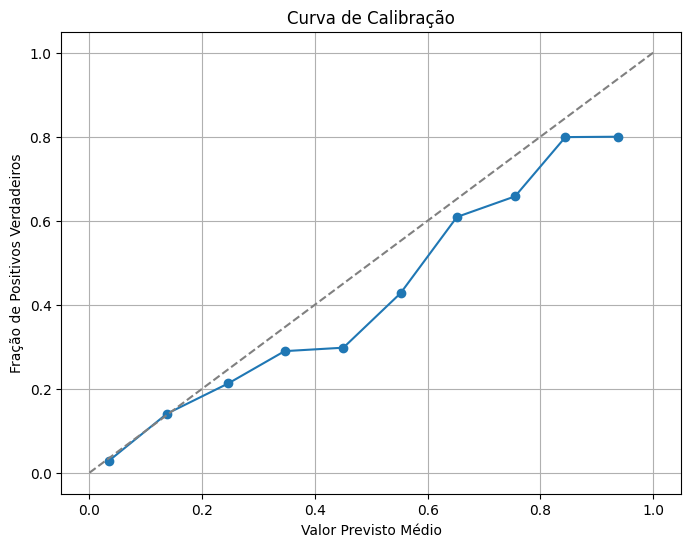

In [29]:
from sklearn.calibration import calibration_curve

# Associar os dataset do arquivo A652 para os conjuntos de treinamento e teste
X_Train = C_X_train_A652
y_Train = C_y_train_A652
X_test = C_X_test_A652
y_test = C_y_test_A652

# Aplicar o treinamento no algoritmo Gradient Boosting Classifier
modelGB = GradientBoostingClassifier(random_state=1)   
modelGB.fit(X_train, y_train)

# Fazer a predição de Gradient Boosting Classifier
y_predict_GB = modelGB.predict(X_test)

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_predict_GB)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_predict_GB)
    
# Obter as probabilidades previstas
prob_pos = modelGB.predict_proba(X_test)[:, 1]

# Calcular a curva de calibração
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)

# Gráfico de calibração
plt.figure(figsize=(8, 6))
plt.plot(mean_predicted_value, fraction_of_positives, marker='o', linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Linha de referência perfeita
plt.xlabel('Valor Previsto Médio')
plt.ylabel('Fração de Positivos Verdadeiros')
plt.title('Curva de Calibração')
plt.grid(True)
plt.show()


Para melhor o resultado, será utilizado o Scaler e alterações nos hiperparâmentros do algoritmo GradientBoostingClassifier

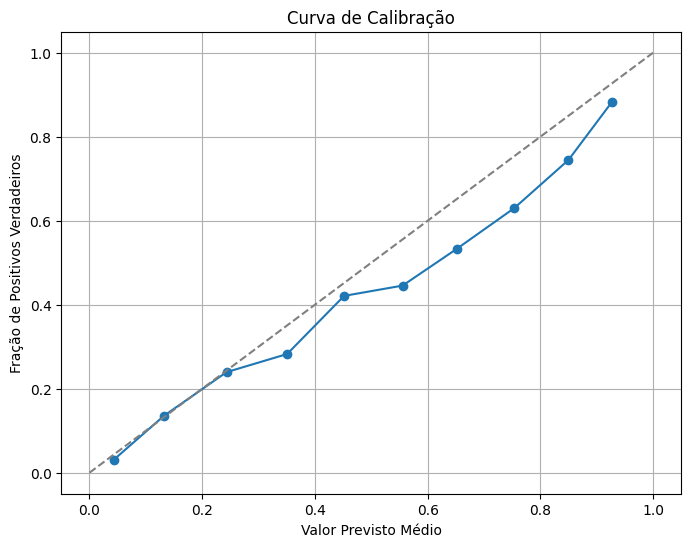

In [30]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Preprocessing MixMax
minmax_scale = MinMaxScaler()
X_train = minmax_scale.fit_transform(X_train)
X_test = minmax_scale.transform(X_test)

# Aplicar o treinamento no algoritmo Gradient Boosting Classifier
modelGB = GradientBoostingClassifier(learning_rate=0.6, n_estimators=50, max_depth=1)   
modelGB.fit(X_train, y_train)

# Fazer a predição de Gradient Boosting Classifier
y_predict_GB = modelGB.predict(X_test)

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_predict_GB)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_predict_GB)
    
# Obter as probabilidades previstas
prob_pos = modelGB.predict_proba(X_test)[:, 1]

# Calcular a curva de calibração
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)

# Gráfico de calibração
plt.figure(figsize=(8, 6))
plt.plot(mean_predicted_value, fraction_of_positives, marker='o', linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Linha de referência perfeita
plt.xlabel('Valor Previsto Médio')
plt.ylabel('Fração de Positivos Verdadeiros')
plt.title('Curva de Calibração')
plt.grid(True)
plt.show()


Com as alterações a curva de calibração teve melhor aderência ao modelo

# 6

Para este exercício faremos a importação das bibliotecas novamente e o carregamento do arquivo de diamantes e seu devido tratamento para dados não numéricos

In [50]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

# Carregar o dataset a partir do arquivo texto
dataset = pd.read_csv('../data/diamonds.csv', header=0)

# Determina um vetor com valores crescentes dos atributos cut, color e clarity
order_cut = ['Fair','Good', 'Very Good', 'Premium', 'Ideal']
order_color = ['J','I','H','G','F','E','D']
order_clarity = ['I3','I2','I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF','FL']

# Adiciona campo cut com numeraçao crescente
order_encoder_cut=OrdinalEncoder(categories=[order_cut])
cut_encoded = order_encoder_cut.fit_transform(dataset[['cut']])
dataset['cut_encoded'] = cut_encoded

# Adiciona campo color com numeraçao crescente
order_encoder_color=OrdinalEncoder(categories=[order_color])
color_encoded = order_encoder_color.fit_transform(dataset[['color']])
dataset['color_encoded'] = color_encoded

# Adiciona campo clarity com numeraçao crescente
order_encoder_clarity=OrdinalEncoder(categories=[order_clarity])
clarity_encoded = order_encoder_clarity.fit_transform(dataset[['clarity']])
dataset['clarity_encoded'] = clarity_encoded

# Remover as colunas de objetos que foram transformados
dataset = dataset.drop('cut', axis=1)
dataset = dataset.drop('color', axis=1)
dataset = dataset.drop('clarity', axis=1)

# Remove o campo identidade do ínico
dataset = dataset.drop(dataset.columns[0], axis=1) 
dataset.head()
dataset.drop(dataset.columns[0], axis=1)

# Remover os registros onde a dimensão do diamante é zero
dataset = dataset.drop(dataset[dataset["x"]==0].index)
dataset = dataset.drop(dataset[dataset["y"]==0].index)
dataset = dataset.drop(dataset[dataset["z"]==0].index)


# Reduz dataset para processar rotina mais rápido (em teste)
#dataset = dataset.iloc[0:30]
 

dataset.shape

(53920, 9)

In [51]:
# Como outer_cv foi definida a quantidade de 3 folds
outer_cv = KFold(3)

# Duas interações internas
inner_cv = KFold(3)

# Define as features e o target do modelo (campo price) para predizer o valor
X= dataset.drop(["price"],axis =1)
y= dataset["price"] 

# give shorthand names to models and use those as dictionary keys mapping
# to models and parameter grids for that model
models_and_parameters = {
    'knr': (KNeighborsRegressor(),
            {'n_neighbors': [5, 10, 15]}),
    'lgr': (LogisticRegression(),
           {'C': [0.01, 0.1, 0.15]})}

# we will collect the average of the scores on the 3 outer folds in this dictionary
# with keys given by the names of the models in `models_and_parameters`
average_scores_across_outer_folds_for_each_model = dict()

# find the model with the best generalization error
for name, (model, params) in models_and_parameters.items():
    # this object is a regressor that also happens to choose
    # its hyperparameters automatically using `inner_cv`
    regressor_that_optimizes_its_hyperparams = GridSearchCV(
        estimator=model, param_grid=params,
        cv=inner_cv, scoring='neg_mean_squared_error')

    scores_across_outer_folds = cross_val_score(
        regressor_that_optimizes_its_hyperparams,
        X, y, cv=outer_cv, scoring='neg_mean_squared_error', error_score='raise')
    
    # get the mean MSE across each of outer_cv's 3 folds
    average_scores_across_outer_folds_for_each_model[name] = np.mean(scores_across_outer_folds)
    error_summary = 'Model: {name}\nMSE in the 3 outer folds: {scores}.\nAverage error: {avg}'
    print(error_summary.format(
        name=name, scores=scores_across_outer_folds,
        avg=np.mean(scores_across_outer_folds)))
    print()


print('Average score across the outer folds: ',
      average_scores_across_outer_folds_for_each_model)

many_stars = '\n' + '*' * 100 + '\n'
print(many_stars + 'Now we choose the best model and refit on the whole dataset' + many_stars)

best_model_name, best_model_avg_score = max(
    average_scores_across_outer_folds_for_each_model.items(),
    key=(lambda name_averagescore: name_averagescore[1]))

# get the best model and its associated parameter grid
best_model, best_model_params = models_and_parameters[best_model_name]

# now we refit this best model on the whole dataset so that we can start
# making predictions on other data, and now we have a reliable estimate of
# this model's generalization error and we are confident this is the best model
# among the ones we have tried
final_regressor = GridSearchCV(best_model, best_model_params, cv=inner_cv)
final_regressor.fit(X, y)

print('Best model: \n\t{}'.format(best_model), end='\n\n')
print('Estimation of its generalization error (negative mean squared error):\n\t{}'.format(
    best_model_avg_score), end='\n\n')
print('Best parameter choice for this model: \n\t{params}'
      '\n(according to cross-validation `{cv}` on the whole dataset).'.format(
      params=final_regressor.best_params_, cv=inner_cv))

Model: knr
MSE in the 3 outer folds: [ -3454923.17479248 -19600507.25286943   -725970.3011278 ].
Average error: -7927133.576263235

Model: lgr
MSE in the 3 outer folds: [ -7944170.65917436 -31187855.69548767  -1047903.43392867].
Average error: -13393309.929530235

Average score across the outer folds:  {'knr': -7927133.576263235, 'lgr': -13393309.929530235}

****************************************************************************************************
Now we choose the best model and refit on the whole dataset
****************************************************************************************************

Best model: 
	KNeighborsRegressor()

Estimation of its generalization error (negative mean squared error):
	-7927133.576263235

Best parameter choice for this model: 
	{'n_neighbors': 15}
(according to cross-validation `KFold(n_splits=3, random_state=None, shuffle=False)` on the whole dataset).
